# Wine Quality Prediction 

by Sanjeet Kumar Pradhan

# Installing Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

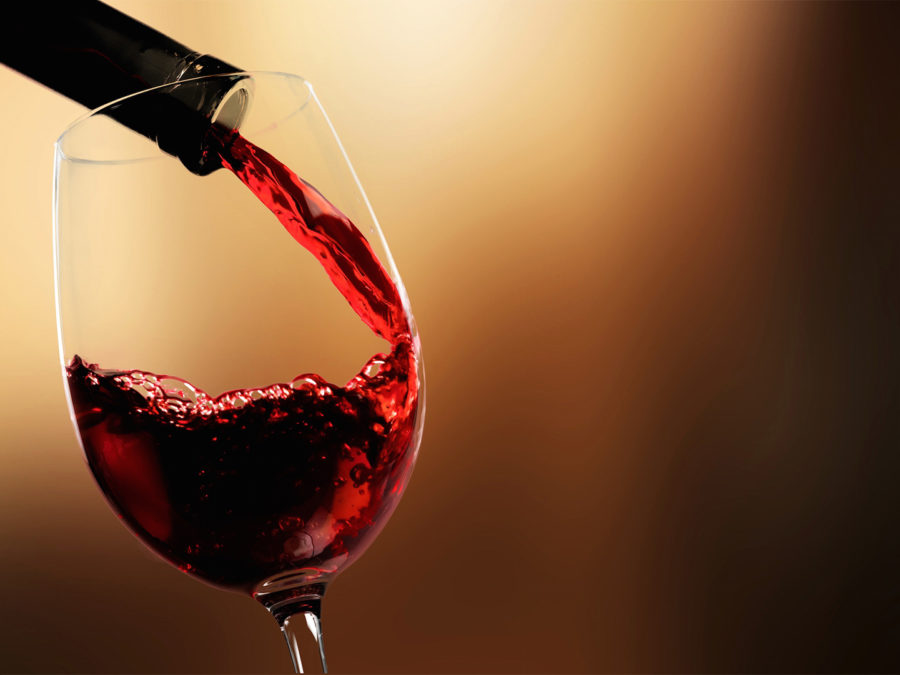

# Reading and Cleaning the data

In [6]:
df=pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
df.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [10]:
df.shape

(1143, 12)

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Plotting

<Axes: >

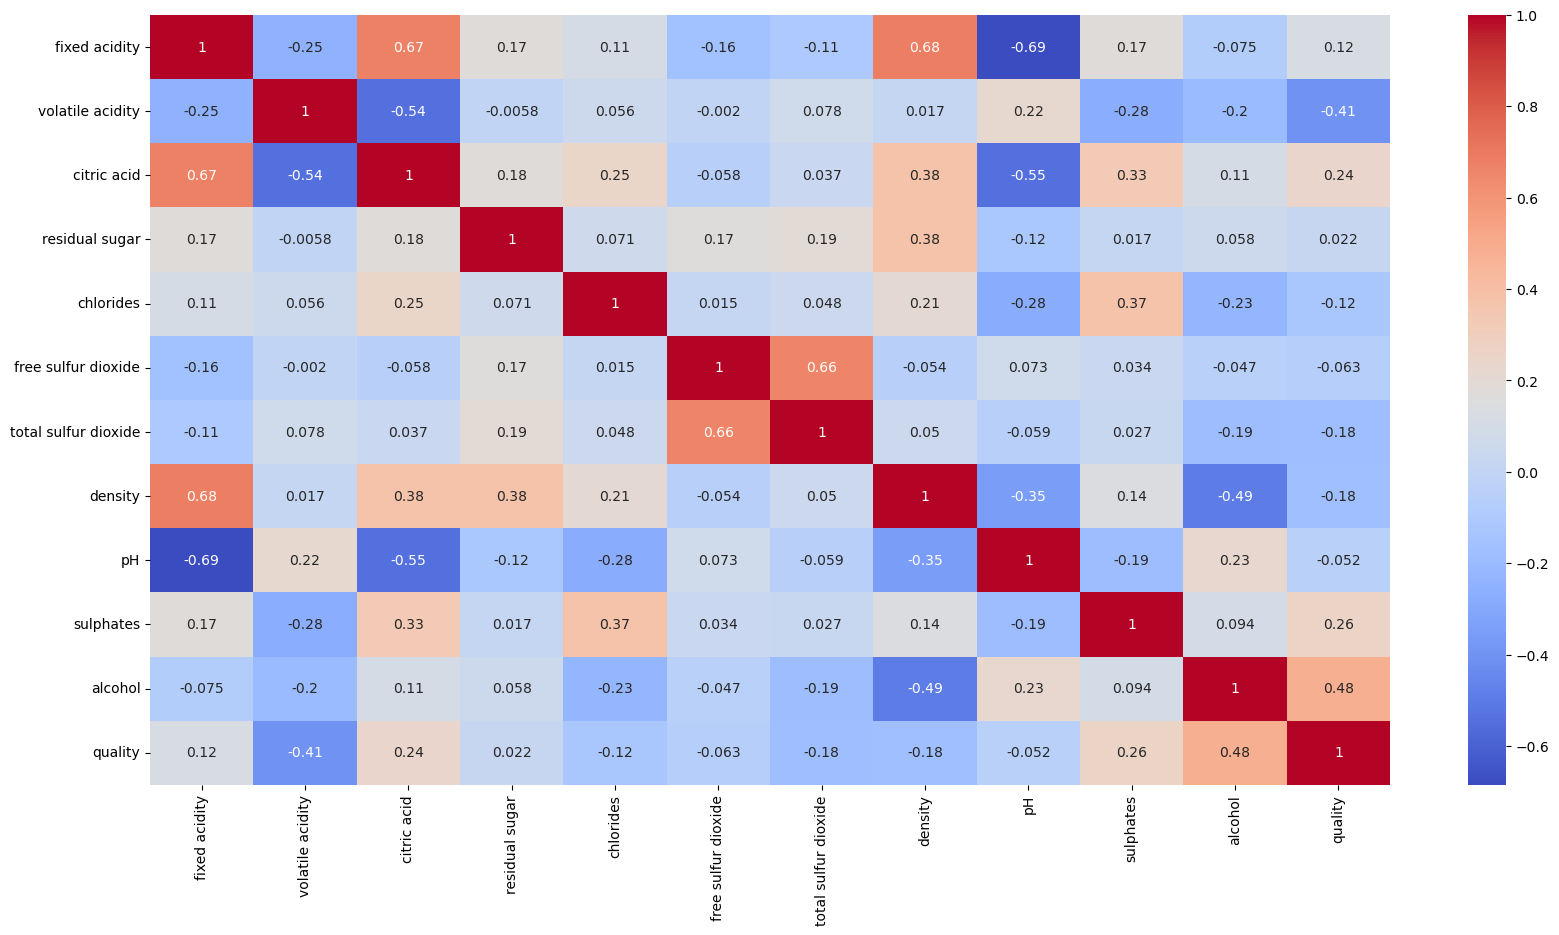

In [12]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<function matplotlib.pyplot.show(close=None, block=None)>

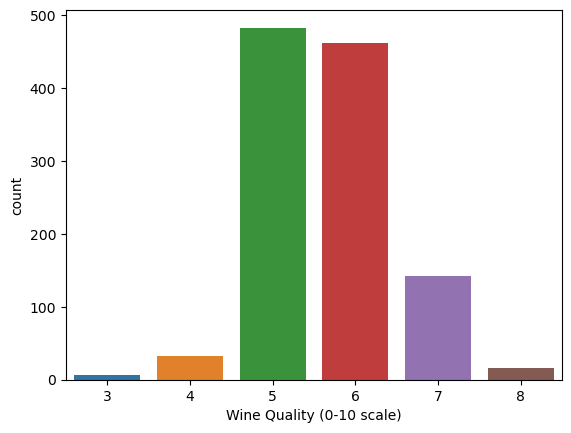

In [13]:
sns.countplot(x='quality',data=df)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show

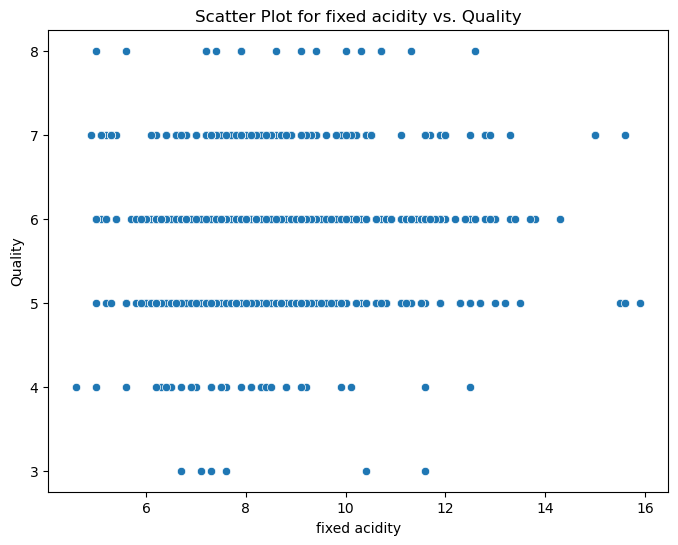

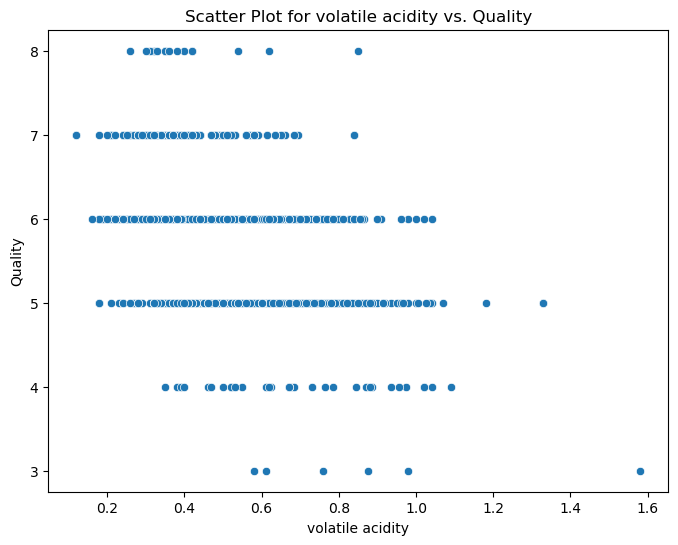

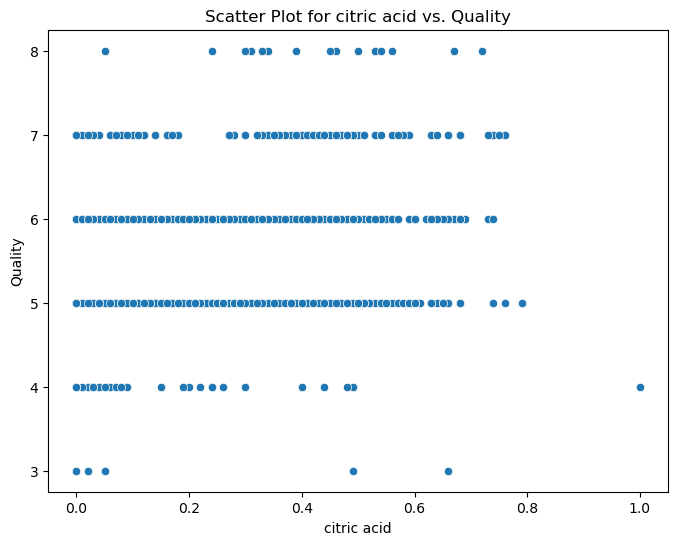

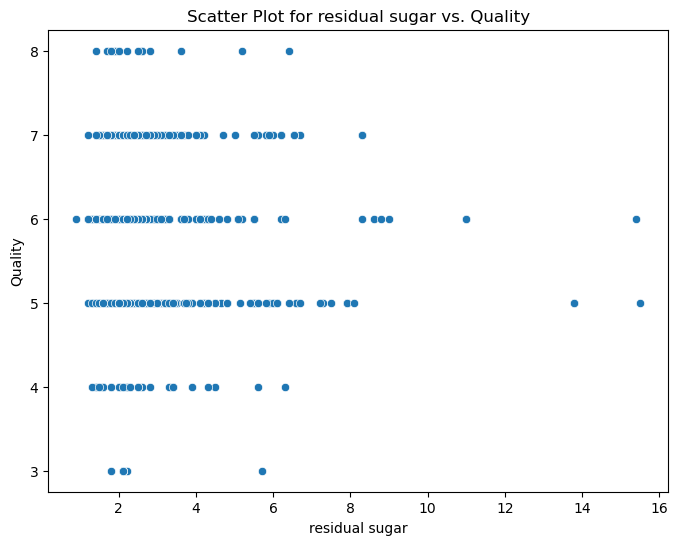

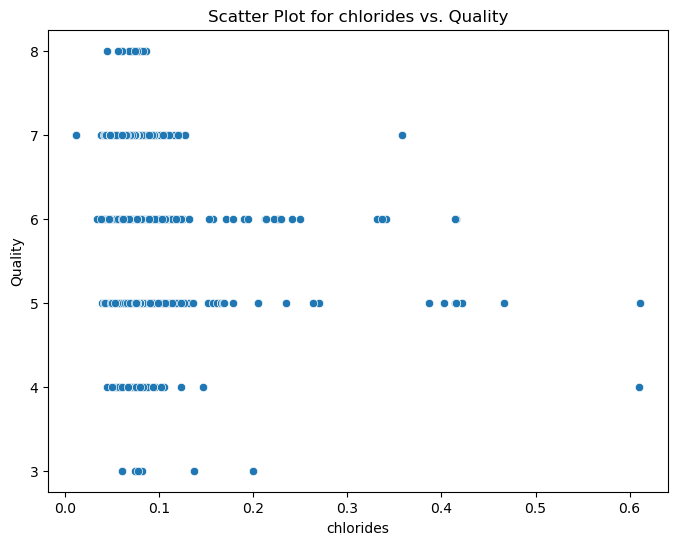

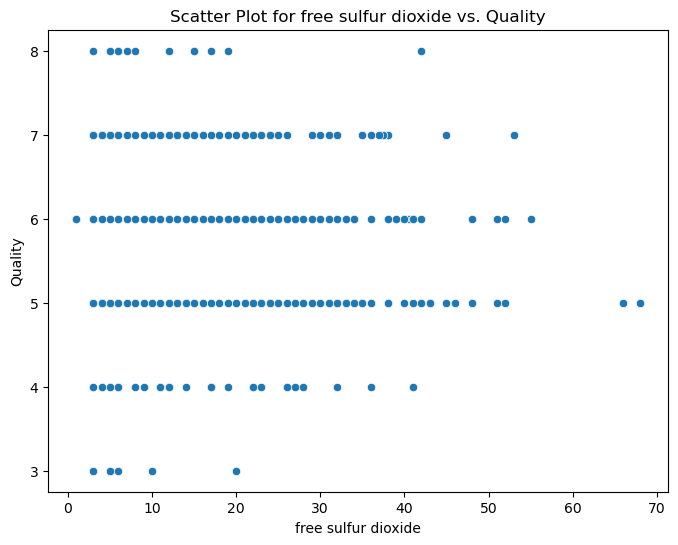

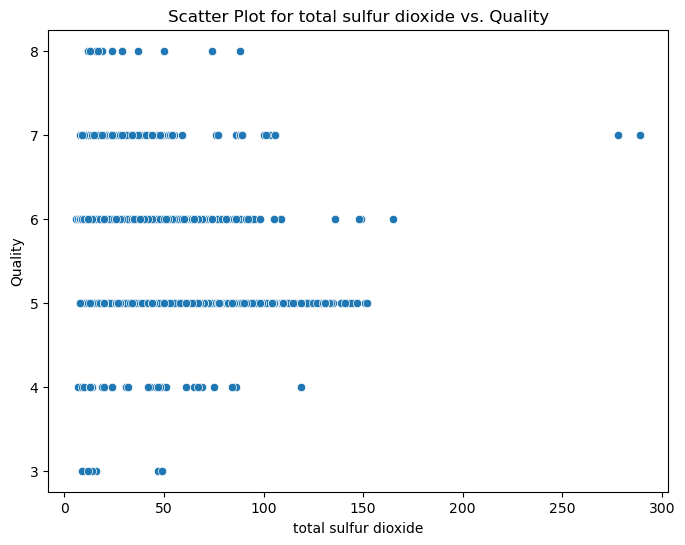

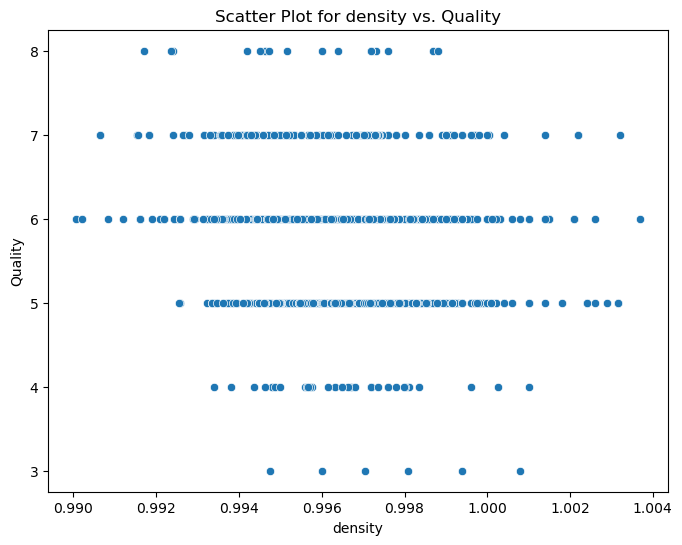

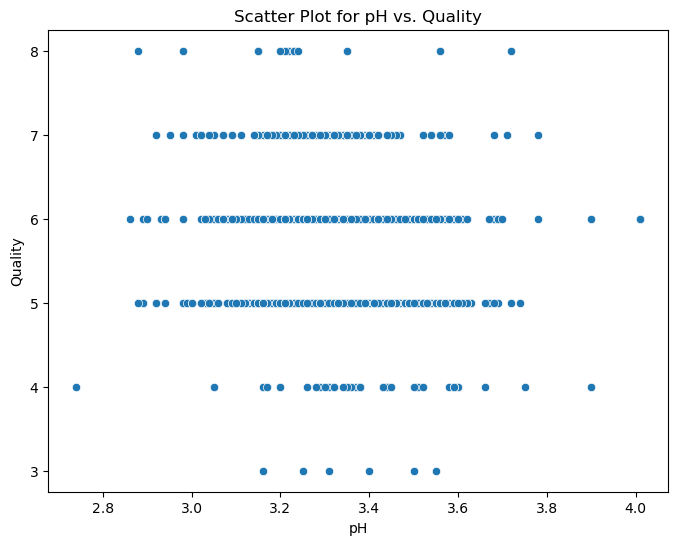

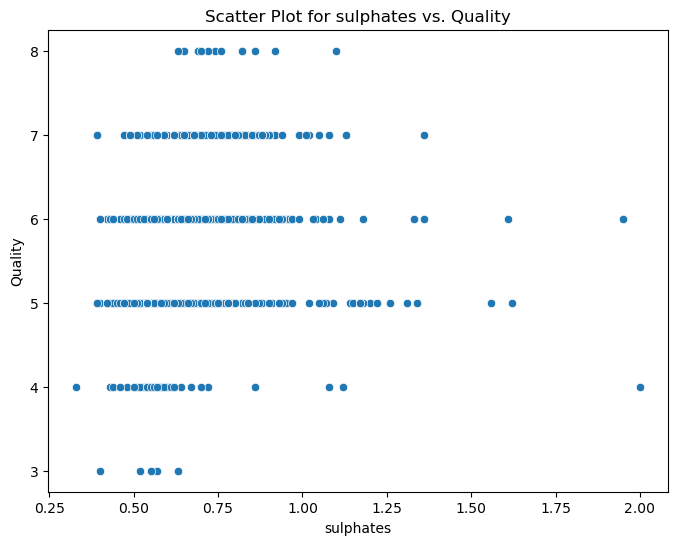

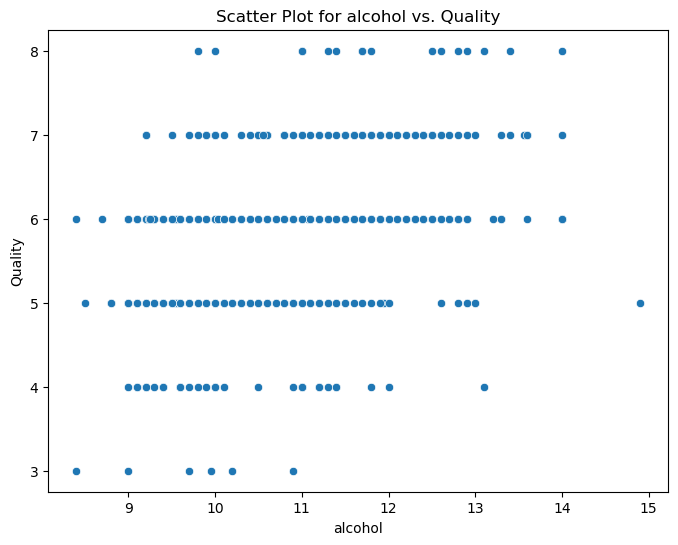

In [15]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
# Create separate scatter plots for each feature against 'quality'
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='quality', data=df)
    plt.title(f'Scatter Plot for {feature} vs. Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.show()

# Training and Testing

In [49]:
X = df.drop(columns=['quality']) #['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y = df['quality']

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [133]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1050,6.1,0.60,0.08,1.80,0.071,14.0,45.0,0.99336,3.38,0.54,11.0
175,10.8,0.32,0.44,1.60,0.063,16.0,37.0,0.99850,3.22,0.78,10.0
198,8.9,0.40,0.32,5.60,0.087,10.0,47.0,0.99910,3.38,0.77,10.5
535,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5
81,9.4,0.40,0.31,2.20,0.090,13.0,62.0,0.99660,3.07,0.63,10.5
...,...,...,...,...,...,...,...,...,...,...,...
1033,6.6,0.58,0.02,2.00,0.062,37.0,53.0,0.99374,3.35,0.76,11.6
763,8.7,0.42,0.45,2.40,0.072,32.0,59.0,0.99617,3.33,0.77,12.0
835,9.8,0.39,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4
559,7.1,0.52,0.03,2.60,0.076,21.0,92.0,0.99745,3.50,0.60,9.8


In [134]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
946,9.1,0.775,0.22,2.2,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
142,6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4
934,9.1,0.760,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1
625,9.0,0.800,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4
124,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5
...,...,...,...,...,...,...,...,...,...,...,...
651,9.6,0.410,0.37,2.3,0.091,10.0,23.0,0.99786,3.24,0.56,10.5
122,7.4,0.620,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.5
713,8.9,0.380,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
545,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6


In [135]:
y_train

1050    5
175     6
198     7
535     5
81      6
       ..
1033    7
763     6
835     5
559     5
684     7
Name: quality, Length: 914, dtype: int64

In [136]:
y_test

946    5
142    4
934    6
625    6
124    5
      ..
651    5
122    6
713    7
545    5
568    5
Name: quality, Length: 229, dtype: int64

# Coefficient

In [137]:
print("Coeffiecents",lm.coef_)

Coeffiecents [ 3.08310365e-02 -1.06947871e+00 -1.25063330e-01  1.81605605e-02
 -1.64966087e+00  2.11069233e-03 -2.61673486e-03 -1.87523927e+01
 -2.87715374e-01  9.08118386e-01  2.73778421e-01]


In [138]:
pd.DataFrame(lm.coef_,index=X.columns,columns=['mycoef'])

,mycoef
fixed acidity,0.030831
volatile acidity,-1.069479
citric acid,-0.125063
residual sugar,0.018161
chlorides,-1.649661
free sulfur dioxide,0.002111
total sulfur dioxide,-0.002617
density,-18.752393
pH,-0.287715
sulphates,0.908118


In [139]:
print("Intercept=",lm.intercept_)

Intercept= 22.371063495938564


# Prediction

In [140]:
y_pred=lm.predict(X_test)
y_pred

array([5.07371239, 5.1390831 , 5.14988592, 5.38607423, 5.38136227,
       5.747996  , 5.43329898, 6.02349549, 6.09422892, 6.52191101,
       4.68438989, 5.94616081, 5.29174352, 5.32414253, 6.23266163,
       4.99064466, 5.61613052, 5.37340495, 4.90829175, 4.99793563,
       6.27610601, 5.16227148, 5.33595129, 5.43623465, 5.11172161,
       5.26158075, 5.32176407, 6.02349549, 5.82035956, 5.35607004,
       5.29900096, 5.80090511, 5.80967029, 6.13337347, 5.81813839,
       5.41954654, 5.62539847, 5.69738026, 5.15765478, 5.70613395,
       5.36950676, 6.1744339 , 5.47167102, 6.08546027, 5.05871054,
       5.33747193, 5.31027484, 6.20452724, 6.42223514, 6.05806483,
       5.37939504, 6.03768477, 5.61816551, 6.39144265, 5.39539393,
       5.34751497, 5.48026892, 5.3537851 , 4.53377559, 5.75458469,
       5.55809318, 5.05375805, 5.71650776, 5.29650589, 5.34838143,
       5.30017282, 6.36730966, 4.97662297, 5.48580548, 5.6092824 ,
       4.9361567 , 5.71742233, 5.55837701, 6.20220216, 6.01266

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Create and train the Linear Regression model
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# Make predictions and round them to the nearest integer
predictions = lm.predict(X_test).round().astype(int)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {:.2%}'.format(accuracy))

Accuracy: 65.50%


In [142]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.36681222707423583
Mean Squared Error: 0.4104803493449782
Root Mean Squared Error: 0.6406874037664375


In [143]:
pd.DataFrame(np.c_[y_test ,y_pred] , columns =['Actual' , 'Predicted(Linear Regression)'])

,Actual,Predicted(Linear Regression)
0,5.0,5.073712
1,4.0,5.139083
2,6.0,5.149886
3,6.0,5.386074
4,5.0,5.381362
...,...,...
224,5.0,5.773613
225,6.0,5.795799
226,7.0,6.602731
227,5.0,5.093035


# THANK YOU